In [124]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series,DataFrame
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集

In [3]:
df = pd.read_table('milkpowder_result.txt')

C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(1564830, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564830 entries, 0 to 1564829
Data columns (total 22 columns):
爬取时间(__time)              1564830 non-null object
爬取链接(__url)               1564830 non-null object
评价时间(create_time)         1564830 non-null object
评分(score)                 1564830 non-null int64
评价内容(rateContent)         1564830 non-null object
用户地区(userProvince)        1065439 non-null object
评论来自终端(userClientShow)    823828 non-null object
会员等级(userLevelName)       1564830 non-null object
评价者(author)               1564830 non-null object
产品类型(productColor)        1416318 non-null object
用户id(id)                  1564830 non-null int64
消费时间(referenceTime)       1564830 non-null object
品牌                        1564830 non-null object
关键词                       1564830 non-null object
polarity                  1564830 non-null float64
magnitude                 1564830 non-null float64
惊喜                        1564830 non-null float64
喜爱                        1564830 non

In [6]:
df.head(1).T

,0
爬取时间(__time),2017/3/4 20:08
爬取链接(__url),https://club.jd.com/comment/productPageComment...
评价时间(create_time),2017/3/4 19:48
评分(score),5
评价内容(rateContent),宝宝在月子中心就用这个品牌的奶粉，现在13个月了，已经用3段的啦。非常满意的产品。宝宝现在有...
用户地区(userProvince),上海
评论来自终端(userClientShow),NaN
会员等级(userLevelName),金牌会员
评价者(author),j***0
产品类型(productColor),金装3段1200克三联装


# 数据处理

## 去除不相关字段

In [8]:
df.drop(['爬取时间(__time)','爬取链接(__url)','评价者(author)'],axis = 1,inplace = True)

In [14]:
df.columns

Index(['评价时间(create_time)', '评分(score)', '评价内容(rateContent)',
       '用户地区(userProvince)', '评论来自终端(userClientShow)', '会员等级(userLevelName)',
       '产品类型(productColor)', '用户id(id)', '消费时间(referenceTime)', '品牌', '关键词',
       'polarity', 'magnitude', '惊喜', '喜爱', '兴奋', '厌恶', '失望', '愤怒'],
      dtype='object')

## 缺失值处理

In [17]:
cols = list(df.columns)
missing = list(map(lambda i:df[i].isnull().sum(),cols))
missing_dict = dict(zip(cols,missing))
missing_dict

{'magnitude': 0,
 'polarity': 0,
 '产品类型(productColor)': 148512,
 '会员等级(userLevelName)': 0,
 '关键词': 0,
 '兴奋': 0,
 '厌恶': 0,
 '品牌': 0,
 '喜爱': 0,
 '失望': 0,
 '惊喜': 0,
 '愤怒': 0,
 '消费时间(referenceTime)': 0,
 '用户id(id)': 0,
 '用户地区(userProvince)': 499391,
 '评价内容(rateContent)': 0,
 '评价时间(create_time)': 0,
 '评分(score)': 0,
 '评论来自终端(userClientShow)': 741002}

In [18]:
df = df.fillna({'用户地区(userProvince)':'unknown_place',
          '评论来自终端(userClientShow)':'unknown_client',
          '产品类型(productColor)':'unknown_type'})
[df[i].isnull().sum() for i in cols]    #表明替换成功

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## 重复值处理

In [19]:
df.duplicated(['用户id(id)','消费时间(referenceTime)']).value_counts()

False    1081851
True      482979
dtype: int64

In [21]:
df.drop_duplicates(['用户id(id)','消费时间(referenceTime)'],inplace = True)
df.shape

(1081851, 19)

## 异常值检查与处理

### 用户地区

In [69]:
df['用户地区(userProvince)'].value_counts().head(10)

unknown_place    334426
北京               131008
广东               125053
江苏                62290
上海                49777
四川                39483
山东                35338
湖北                26505
浙江                25685
河北                24683
Name: 用户地区(userProvince), dtype: int64

In [24]:
df[df['用户地区(userProvince)'].isin(['县城内','野徐镇','凤凰街道','京泰路街道'])]

,评价时间(create_time),评分(score),评价内容(rateContent),用户地区(userProvince),评论来自终端(userClientShow),会员等级(userLevelName),产品类型(productColor),用户id(id),消费时间(referenceTime),品牌,关键词,polarity,magnitude,惊喜,喜爱,兴奋,厌恶,失望,愤怒
249939,2014/8/17 5:17,5,大品牌~不错,野徐镇,unknown_client,铜牌会员,900g 桶装,399091079,2014/8/4 23:54,惠氏--三段,品牌,69.020,0.100,0.252613,0.437587,0.000000,0.140649,0.000000,0.169151
288884,2014/3/5 3:25,5,质量放心宝宝喜欢喝,京泰路街道,unknown_client,铜牌会员,900g 桶装,288110827,2014/2/18 15:56,惠氏--三段,质量,86.766,0.473,0.393918,0.473742,0.000000,0.085359,0.000000,0.046981
925925,2015/7/14 8:50,5,质量还不错使用中,县城内,来自京东Android客户端,银牌会员,3段900g,845039446,2015/7/12 16:23,雅培--三段,质量,69.747,0.127,0.599127,0.098343,0.000000,0.078355,0.000000,0.224175
955695,2015/4/19 21:33,5,第三次买了，很划算的,县城内,unknown_client,银牌会员,3段900g,666785074,2015/4/18 5:53,雅培--三段,划算,75.865,0.186,0.438500,0.320150,0.000000,0.128640,0.000000,0.112710
961599,2015/3/24 23:42,5,大品牌信赖，更信赖京东的送货速度和送货人员,县城内,unknown_client,银牌会员,3段400g,621857798,2015/3/23 2:00,雅培--三段,品牌,69.000,0.700,0.000000,0.690000,0.000000,0.163370,0.000000,0.146630
961600,2015/3/24 23:41,5,正品行货，价格便宜，送货速度快,县城内,unknown_client,银牌会员,3段900g,621857513,2015/3/23 6:37,雅培--三段,价格,86.767,0.441,0.000000,0.867670,0.000000,0.000000,0.104144,0.028186
999110,2014/9/8 13:28,5,包装完好，没有碰撞的痕迹,凤凰街道,unknown_client,铜牌会员,新包装3段900克,416532800,2014/8/20 17:44,雅培--三段,包装,63.845,0.377,0.363916,0.000000,0.274533,0.000000,0.195960,0.165590


In [25]:
df = df[~df['用户地区(userProvince)'].isin(['县城内','野徐镇','凤凰街道','京泰路街道'])]
df['用户地区(userProvince)'].value_counts()

unknown_place    334426
北京               131008
广东               125053
江苏                62290
上海                49777
四川                39483
山东                35338
湖北                26505
浙江                25685
河北                24683
河南                22145
安徽                21083
天津                20830
福建                20465
辽宁                17851
陕西                16826
湖南                13998
广西                12416
重庆                11582
江西                 9629
山西                 9565
云南                 7443
黑龙江                6516
吉林                 5700
海南                 5153
贵州                 4652
内蒙古                4617
甘肃                 4485
新疆                 4247
宁夏                 2765
青海                 2610
西藏                 2480
台湾                  242
钓鱼岛                 151
香港                  127
澳门                   18
Name: 用户地区(userProvince), dtype: int64

### 评论终端

In [27]:
df['评论来自终端(userClientShow)'].value_counts()

unknown_client    473471
来自京东Android客户端    415144
来自京东iPhone客户端     164419
来自微信购物             16500
来自京东iPad客户端         9719
来自手机QQ购物            2586
来自京东Symbian客户端         5
Name: 评论来自终端(userClientShow), dtype: int64

unknown_client 有可能是PC端

### 品牌与产品类型

In [28]:
df['品牌'].value_counts()

美素--三段    273941
惠氏--三段    206075
优诺能       140251
雅培--三段    139364
惠氏--1段     68521
惠氏--二段     62773
美素1段       61198
惠氏--四段     49188
雅培--四段     45306
美素--四段     35227
Name: 品牌, dtype: int64

In [32]:
df['品牌'].replace(['惠氏--1段','美素1段'],['惠氏--一段','美素--一段'],inplace = True)

In [33]:
df['品牌'].value_counts()

美素--三段    273941
惠氏--三段    206075
优诺能       140251
雅培--三段    139364
惠氏--一段     68521
惠氏--二段     62773
美素--一段     61198
惠氏--四段     49188
雅培--四段     45306
美素--四段     35227
Name: 品牌, dtype: int64

In [37]:
pure = df['品牌'].str.findall(r'美素|惠氏|优诺能|雅培').str[0]
df.insert(10,'品牌商',pure)

In [38]:
df.head(2)

,评价时间(create_time),评分(score),评价内容(rateContent),用户地区(userProvince),评论来自终端(userClientShow),会员等级(userLevelName),产品类型(productColor),用户id(id),消费时间(referenceTime),品牌,品牌商,关键词,polarity,magnitude,惊喜,喜爱,兴奋,厌恶,失望,愤怒
0,2017/3/4 19:48,5,宝宝在月子中心就用这个品牌的奶粉，现在13个月了，已经用3段的啦。非常满意的产品。宝宝现在有...,上海,unknown_client,金牌会员,金装3段1200克三联装,10182323425,2017/3/2 15:00,惠氏--三段,惠氏,品牌,74.792,0.131,0.144349,0.603571,0.000000,0.111167,0.0,0.140913
3,2017/3/4 19:39,5,一直买 这个 越来越贵了,unknown_place,unknown_client,银牌会员,金装3段1200克三联装,10182297636,2017/2/22 20:15,惠氏--三段,惠氏,贵,6.250,1.000,0.037375,0.000000,0.025125,0.194062,0.0,0.743437


In [43]:
df['品牌商'].value_counts()

惠氏     386557
美素     370366
雅培     184670
优诺能    140251
Name: 品牌商, dtype: int64

### 关键词

In [40]:
pd.DataFrame(df['关键词'].value_counts())

,关键词
价格,197680
质量,166475
便宜,108822
品牌,96820
快递,67812
物流,66298
包装,52947
实惠,44082
味道,42278
服务,36074


#### 做近义词替换处理

```
观察同样发现有同义词可以进行合并，比如： 价钱-价格，便宜／划算-实惠，快递-物流，质量-品质，成分-配方，有效期-保质期（假定以-右边的为准确描述）
需要留意的是有些词虽然描述的是同一对象，但感情倾向或色彩不同，不能合并，比如：断货、补货、库存；生产日期、过期；还有容易混淆的概念：奶源（指奶粉的主要原材料的产地）和产地（指在哪里生产加工的）
```

In [41]:
df['关键词'].replace(['价钱','便宜','划算','快递','质量','成分','有效期'],['价格','实惠','实惠','物流','品质','配方','保质期'],inplace=True)

#### 关键词计数

In [44]:
pd.DataFrame(df['关键词'].value_counts())

,关键词
价格,206986
品质,191083
实惠,180868
物流,134110
品牌,96820
包装,52947
味道,42278
服务,36074
性价比,20953
配方,17793


## 评分

In [45]:
df['评分(score)'].value_counts()

5    1009193
4      45588
1      11695
3      11566
2       3802
Name: 评分(score), dtype: int64

In [46]:
#Low(L):1分、2分；Medium(M):3分、4分；High(H):5分
df.loc[df['评分(score)']<=2,'slabel']='L'
df.loc[(df['评分(score)']>2) & (df['评分(score)']<5),'slabel']='M'
df.loc[df['评分(score)']==5,'slabel']='H'
df.loc[:,['评分(score)','slabel']][210:225]

,评分(score),slabel
289,5,H
290,5,H
291,5,H
292,5,H
293,3,M
294,5,H
295,5,H
296,5,H
297,1,L
298,5,H


## 会员等级

In [47]:
df['会员等级(userLevelName)'].value_counts()  

钻石会员          352544
金牌会员          257049
银牌会员          191505
铜牌会员          169241
PLUS会员         96339
PLUS会员[试用]     11955
企业会员            3154
注册会员              55
VIP会员              2
Name: 会员等级(userLevelName), dtype: int64

## 消费时间和评论时间的处理

In [68]:
df['评价时间(create_time)'] = pd.to_datetime(df['评价时间(create_time)'])
df['消费时间(referenceTime)'] = pd.to_datetime(df['消费时间(referenceTime)'])

In [109]:
df['评价日期'] = pd.to_datetime(df['评价时间(create_time)'], unit='ms').dt.strftime('%Y-%m-%d')
df['消费日期'] = pd.to_datetime(df['消费时间(referenceTime)'], unit='ms').dt.strftime('%Y-%m-%d')

In [110]:
df.columns

Index(['评价时间(create_time)', '评分(score)', '评价内容(rateContent)',
       '用户地区(userProvince)', '评论来自终端(userClientShow)', '会员等级(userLevelName)',
       '产品类型(productColor)', '用户id(id)', '消费时间(referenceTime)', '品牌', '品牌商',
       '关键词', 'polarity', 'magnitude', '惊喜', '喜爱', '兴奋', '厌恶', '失望', '愤怒',
       'slabel', 'plabel', 'mlabel', '评价日期', '消费日期'],
      dtype='object')

# 数据分析

## 品牌商&关键词频次

In [84]:
key_brand = df.groupby(['关键词','品牌商']).size().unstack().fillna(0)
key_brand.head()

品牌商,优诺能,惠氏,美素,雅培
关键词,,,,
产地,61,139,95,503
价格,21862,78127,67772,39225
促销,547,1521,1387,862
保质期,995,646,1165,576
假货,734,1093,1560,684


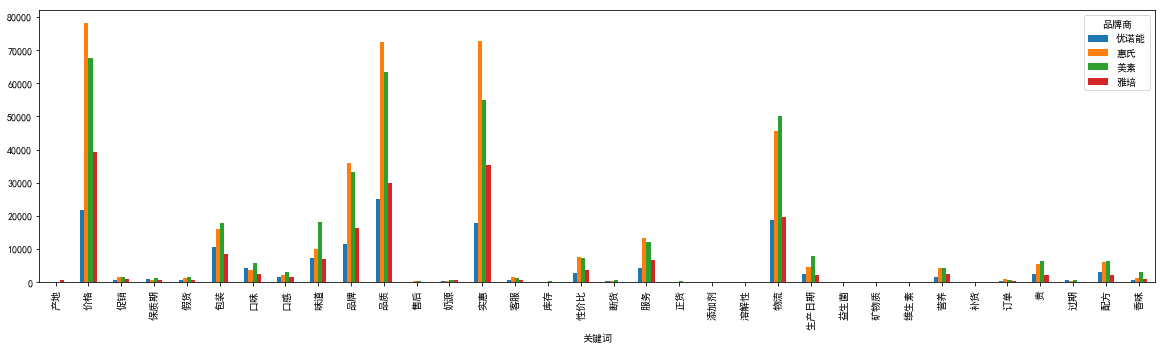

In [82]:
key_brand.plot(kind = 'bar',figsize = (20,5))
ylabel

## 会员等级&关键词频次

In [85]:
key_class= df.groupby(['关键词','会员等级(userLevelName)']).size().unstack().fillna(0)
key_class.head()

会员等级(userLevelName),PLUS会员,PLUS会员[试用],VIP会员,企业会员,注册会员,金牌会员,钻石会员,铜牌会员,银牌会员
关键词,,,,,,,,,
产地,68.0,11.0,0.0,1.0,0.0,230.0,352.0,40.0,96.0
价格,20372.0,2306.0,1.0,641.0,2.0,49831.0,74253.0,28033.0,31547.0
促销,367.0,53.0,0.0,18.0,0.0,980.0,1826.0,470.0,603.0
保质期,282.0,51.0,0.0,9.0,0.0,926.0,1350.0,230.0,534.0
假货,314.0,84.0,0.0,15.0,0.0,1206.0,1239.0,398.0,815.0


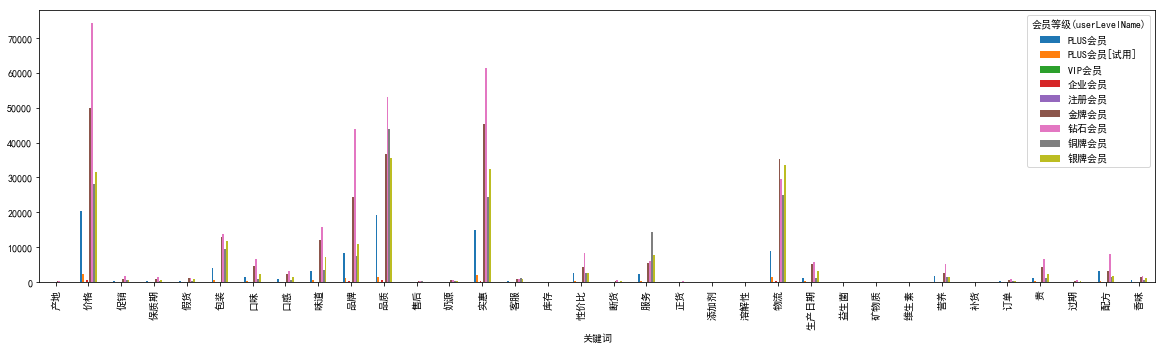

In [86]:
key_class.plot(kind = 'bar',figsize = (20,5))

## 关键词 & polarity&magnitude

In [99]:
key_po= df.groupby(['关键词'])
pola = pd.DataFrame(key_po['polarity'].mean())
pola = pola.sort_values(by = 'polarity',ascending = False)
pola.head()

,polarity
关键词,
服务,81.352600
营养,80.197919
实惠,77.572993
香味,77.097756
味道,76.575112


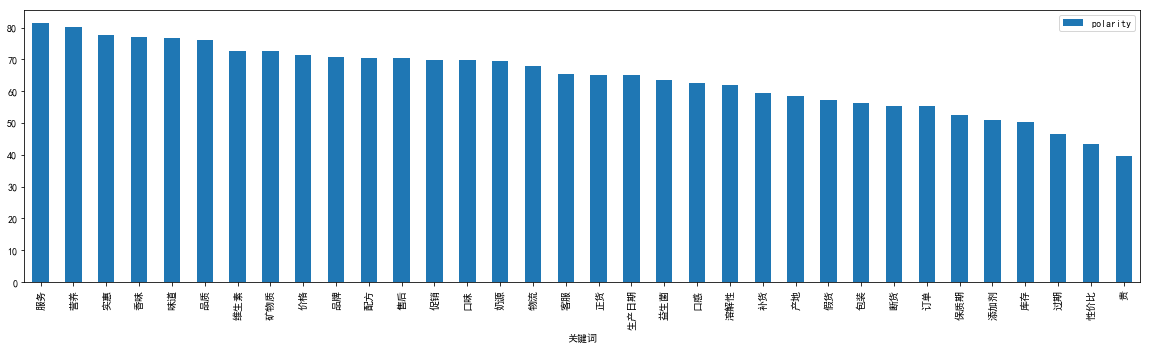

In [100]:
pola.plot(kind = 'bar',figsize = (20,5))

In [58]:
df.loc[df['polarity']>85,'plabel']='高度正面'
df.loc[(df['polarity']<=85) & (df['polarity']>=60),'plabel']='中等'
df.loc[df['polarity']<60,'plabel']='负面'

In [59]:
df.loc[df['magnitude']>0.85,'mlabel']='非常强烈'
df.loc[(df['magnitude']<=0.85) & (df['magnitude']>=0.5),'mlabel']='一般'
df.loc[df['magnitude']<0.5,'mlabel']='相对无感'

In [60]:
df.loc[:,['关键词','polarity','plabel','magnitude','mlabel']].head()

,关键词,polarity,plabel,magnitude,mlabel
0,品牌,74.792,中等,0.131,相对无感
3,贵,6.250,负面,1.000,非常强烈
4,品质,82.204,中等,0.265,相对无感
6,实惠,65.708,中等,0.412,相对无感
8,品质,66.515,中等,0.483,相对无感


In [62]:
df['plabel'].value_counts()

中等      520588
高度正面    352314
负面      208942
Name: plabel, dtype: int64

In [63]:
df['mlabel'].value_counts()

相对无感    833971
一般      210054
非常强烈     37819
Name: mlabel, dtype: int64

## polarity随评论时间的变化

In [138]:
date_po = df.pivot_table('polarity',index = '评价日期',columns = '品牌商',aggfunc = 'mean')
date_po.head()

品牌商,优诺能,惠氏,美素,雅培
评价日期,,,,
2010-07-06,NaN,NaN,NaN,85.6890
2010-07-08,NaN,NaN,NaN,78.5255
2010-07-12,NaN,NaN,NaN,90.0000
2010-07-15,NaN,NaN,NaN,29.8230
2010-07-16,NaN,NaN,NaN,30.3100


In [142]:
fig = plt.figure()

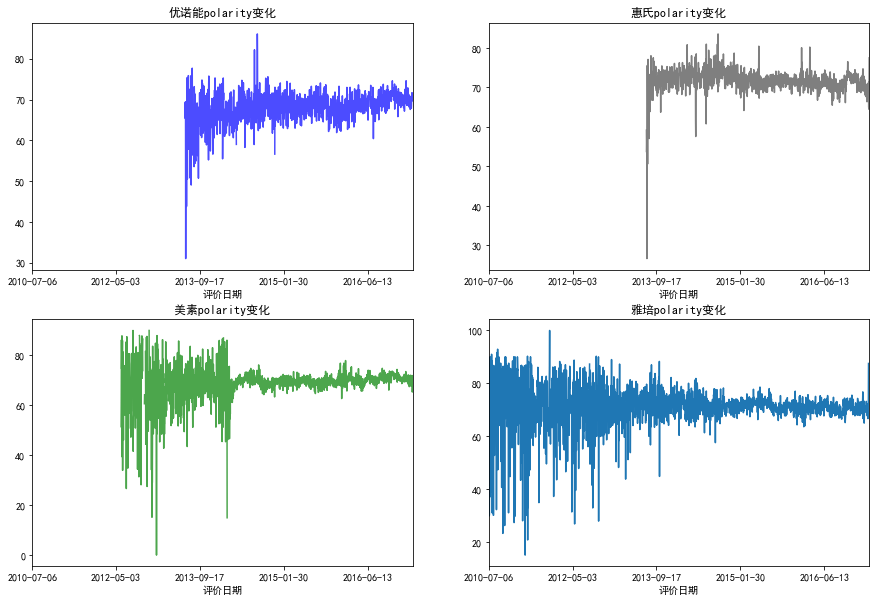

In [157]:
fig,axes = plt.subplots(2,2,figsize = (15,10))
date_po['优诺能'].plot(ax = axes[0][0],color = 'b',alpha = 0.7,title = '优诺能polarity变化')
date_po['惠氏'].plot(ax = axes[0][1],color = 'k',alpha = 0.5,title = '惠氏polarity变化')
date_po['美素'].plot(ax = axes[1][0],color ='g',alpha = 0.7,title = '美素polarity变化')
date_po['雅培'].plot(ax = axes[1][1],title = '雅培polarity变化')

In [158]:
df['评价月份'] = pd.to_datetime(df['评价时间(create_time)'], unit='ms').dt.strftime('%Y-%m')

In [159]:
month_po = df.pivot_table('polarity',index = '评价月份',columns = '品牌商',aggfunc = 'mean')
month_po.head()

品牌商,优诺能,惠氏,美素,雅培
评价月份,,,,
2010-07,NaN,NaN,NaN,62.979533
2010-08,NaN,NaN,NaN,68.630950
2010-09,NaN,NaN,NaN,67.421583
2010-10,NaN,NaN,NaN,73.981231
2010-11,NaN,NaN,NaN,75.401429


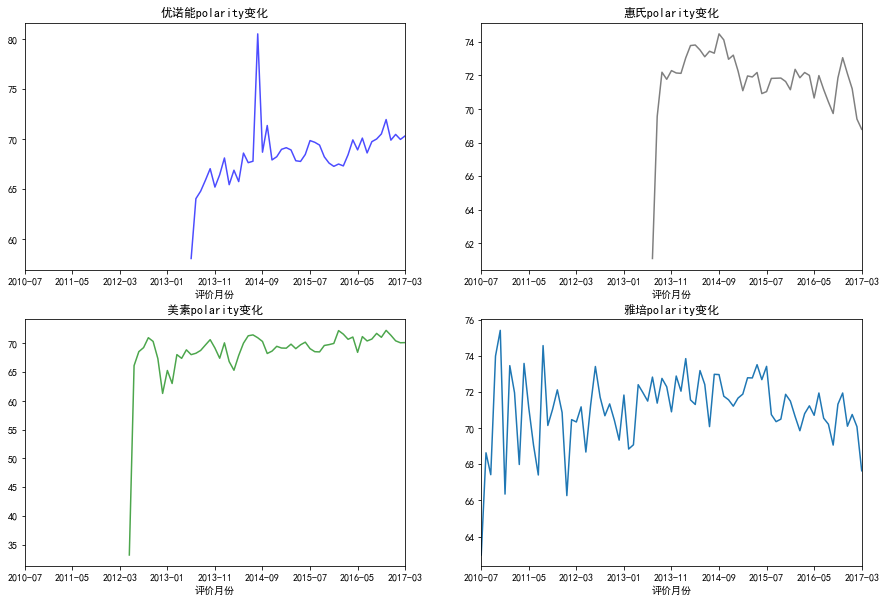

In [160]:
fig,axes = plt.subplots(2,2,figsize = (15,10))
month_po['优诺能'].plot(ax = axes[0][0],color = 'b',alpha = 0.7,title = '优诺能polarity变化')
month_po['惠氏'].plot(ax = axes[0][1],color = 'k',alpha = 0.5,title = '惠氏polarity变化')
month_po['美素'].plot(ax = axes[1][0],color ='g',alpha = 0.7,title = '美素polarity变化')
month_po['雅培'].plot(ax = axes[1][1],title = '雅培polarity变化')

## 具体评论观察

In [101]:
df.loc[df['关键词']=='贵'].head(2)

,评价时间(create_time),评分(score),评价内容(rateContent),用户地区(userProvince),评论来自终端(userClientShow),会员等级(userLevelName),产品类型(productColor),用户id(id),消费时间(referenceTime),品牌,...,magnitude,惊喜,喜爱,兴奋,厌恶,失望,愤怒,slabel,plabel,mlabel
3,2017-03-04 19:39:00,5,一直买 这个 越来越贵了,unknown_place,unknown_client,银牌会员,金装3段1200克三联装,10182297636,2017-02-22 20:15:00,惠氏--三段,...,1.000,0.037375,0.00000,0.025125,0.194062,0.0,0.743437,H,负面,非常强烈
86,2017-03-03 17:47:00,3,奶粉是好，就是总断货，而且升级版的太贵，换美素佳尔了,河北,来自微信购物,金牌会员,金装3段900克罐装,10179109508,2017-02-08 12:50:00,惠氏--三段,...,0.652,0.080960,0.08096,0.000000,0.465134,0.0,0.372946,M,负面,一般


In [103]:
df.loc[86][['品牌商','评价内容(rateContent)','关键词','惊喜','喜爱','兴奋','厌恶','失望','愤怒']]

品牌商                                          惠氏
评价内容(rateContent)    奶粉是好，就是总断货，而且升级版的太贵，换美素佳尔了
关键词                                           贵
惊喜                                      0.08096
喜爱                                      0.08096
兴奋                                            0
厌恶                                     0.465134
失望                                            0
愤怒                                     0.372946
Name: 86, dtype: object

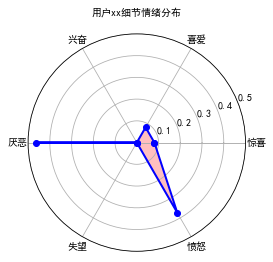

In [106]:
labels = np.array(['惊喜','喜爱','兴奋','厌恶','失望','愤怒'])
dataLenth = 6
data = np.array([0.08096,0.08096,0,0.465134,0,0.372946])  
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data = np.concatenate((data, [data[0]])) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, data, 'bo-', linewidth=2)# 画线
ax.fill(angles, data, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("用户xx细节情绪分布情况",va='bottom', fontproperties="SimHei")
ax.set_rlim(0,0.5)
ax.grid(True)
plt.show()